In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import sklearn
import warnings
warnings.filterwarnings("ignore")
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("Advertising.csv")

In [3]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


observtion  - Its a linear regression problem 

In [4]:
df.keys()

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


observation -3 input columns & 1 output column 


In [7]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [8]:
df.shape


(200, 4)

#200 rows , 4 columns 

In [9]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

Observation- data is in float dtype .no encoding required . 

<AxesSubplot:>

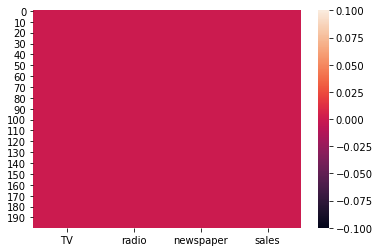

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

Observation- no null value found to treat 

In [12]:
round(df.describe(),3)

,TV,radio,newspaper,sales
count,200.000,200.000,200.000,200.000
mean,147.042,23.264,30.554,14.023
std,85.854,14.847,21.779,5.217
min,0.700,0.000,0.300,1.600
25%,74.375,9.975,12.750,10.375
50%,149.750,22.900,25.750,12.900
75%,218.825,36.525,45.100,17.400
max,296.400,49.600,114.000,27.000


In [13]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

<AxesSubplot:>

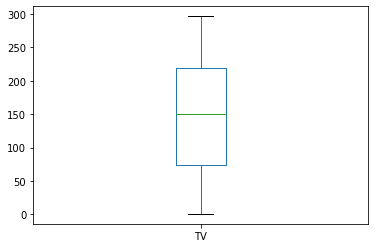

In [14]:
df["TV"].plot.box()

<AxesSubplot:>

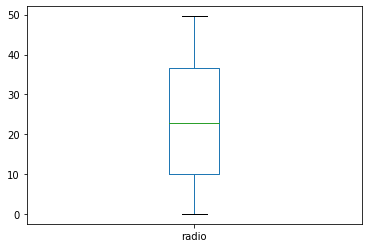

In [15]:
df["radio"].plot.box()

<AxesSubplot:>

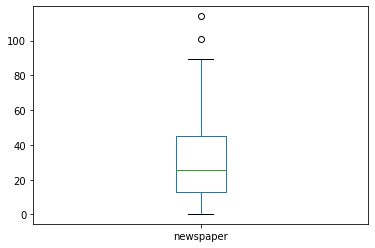

In [16]:
df["newspaper"].plot.box()

observation- no much outliers present in dataset . few are there in the newspaper column

In [17]:
key_list=["TV","radio","newspaper"]

<AxesSubplot:xlabel='TV', ylabel='Density'>

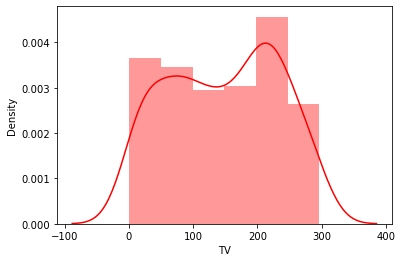

In [18]:
sns.distplot(df['TV'],color="r")

<AxesSubplot:xlabel='radio', ylabel='Density'>

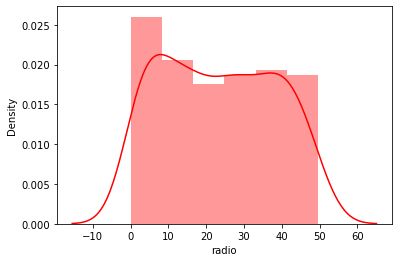

In [19]:
sns.distplot(df['radio'],color="r")

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

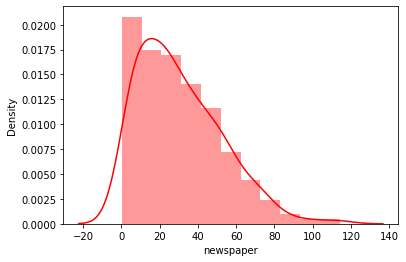

In [20]:
sns.distplot(df['newspaper'],color="r")

observation - as the data is actual sales data so it lies in positive side 
>2-also  the data is little bit skewed 

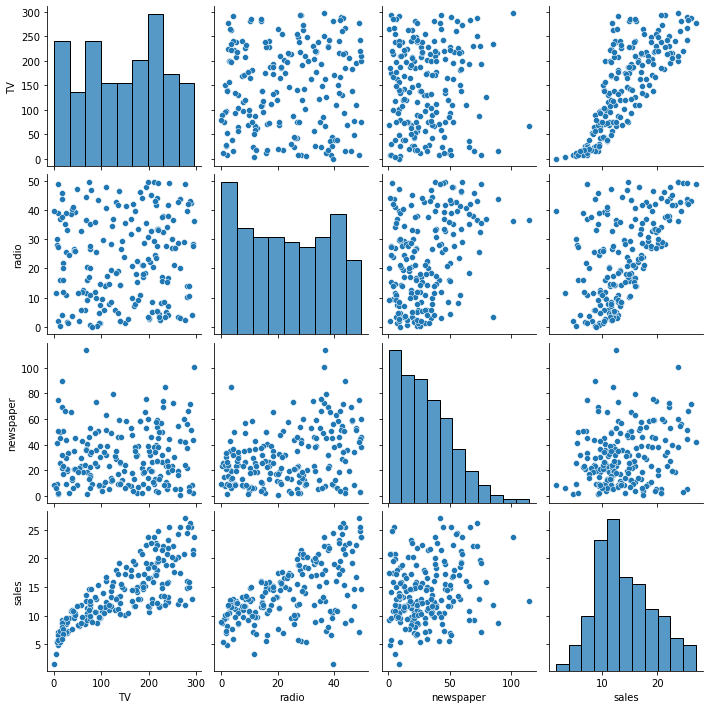

In [21]:
sns.pairplot(df,palette="r") 

observation - tv is imapcting the sale hugely 

In [22]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[9.69852266e-01, 9.81522472e-01, 1.77894547e+00, 1.55205313e+00],
       [1.19737623e+00, 1.08280781e+00, 6.69578760e-01, 6.96046111e-01],
       [1.51615499e+00, 1.52846331e+00, 1.78354865e+00, 9.07405869e-01],
       [5.20496822e-02, 1.21785493e+00, 1.28640506e+00, 8.60330287e-01],
       [3.94182198e-01, 8.41613655e-01, 1.28180188e+00, 2.15683025e-01],
       [1.61540845e+00, 1.73103399e+00, 2.04592999e+00, 1.31091086e+00],
       [1.04557682e+00, 6.43904671e-01, 3.24708413e-01, 4.27042783e-01],
       [3.13436589e-01, 2.47406325e-01, 8.72486994e-01, 1.58039455e-01],
       [1.61657614e+00, 1.42906863e+00, 1.36042422e+00, 1.77205942e+00],
       [6.16042873e-01, 1.39530685e+00, 4.30581584e-01, 6.57617064e-01],
       [9.45155670e-01, 1.17923146e+00, 2.92486143e-01, 1.04190753e+00],
       [7.90028350e-01, 4.96973404e-02, 1.22232878e+00, 6.48970529e-01],
       [1.43908760e+00, 7.99208859e-01, 1.62704048e+00, 9.26620392e-01],
       [5.78501712e-01, 1.05768905e+00, 1.07502697e

In [23]:
df_new=df[(z<3).all(axis=1)] # removed outliers

In [24]:
df_new.shape

(198, 4)

In [25]:
198/200


0.99

Observation - lost 1 % of data after removing outler

<AxesSubplot:>

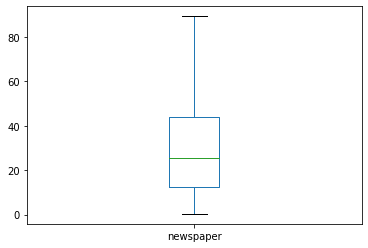

In [26]:
df_new["newspaper"].plot.box()

In [27]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [28]:
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

observation-skewness is not much  yet newspaper to be treated for skewness 

In [29]:
df_new["newspaper"]=np.sqrt(df_new["newspaper"])


<AxesSubplot:xlabel='newspaper', ylabel='Density'>

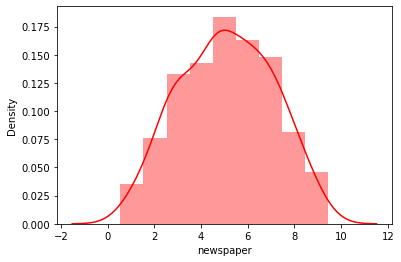

In [30]:
sns.distplot(df_new['newspaper'],color="r")

observation - skweness of newspaper is somehow treated 

<AxesSubplot:xlabel='TV', ylabel='Density'>

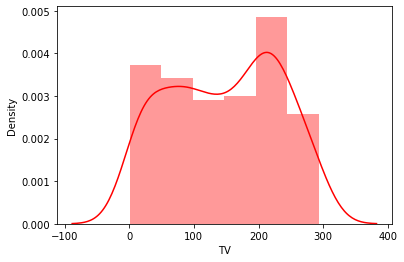

In [31]:
sns.distplot(df_new['TV'],color="r")

In [32]:
cor=df_new.corr()

In [33]:
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.040649
sales        0.407130
dtype: float64

<AxesSubplot:>

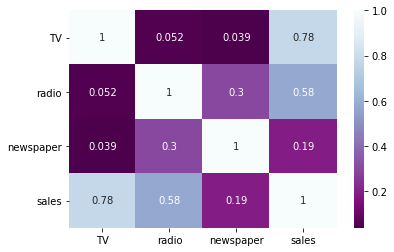

In [34]:
sns.heatmap(cor , annot=True ,cmap="BuPu_r")

Observation-tv and radio are highly negatively corelated . tv is hhighly corelated to output 


<AxesSubplot:>

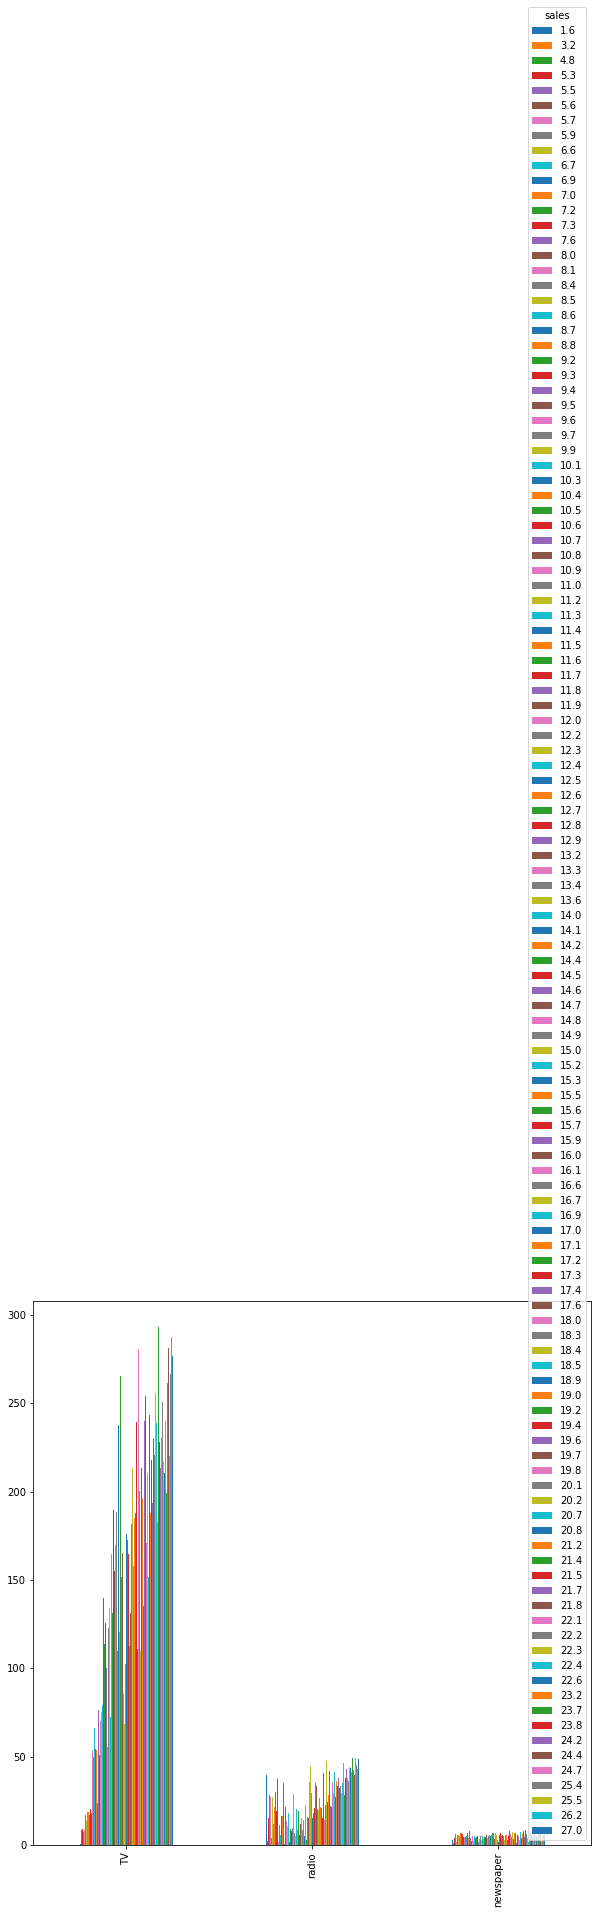

In [35]:
df_new.groupby('sales')[['TV', 'radio', 'newspaper']].mean().T.plot(kind='bar', figsize=(10,10))

observation-  tv is giving high sales and differnce between other souce sale and tv sales is high . 

In [36]:
df.keys()

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [37]:
x=df_new.drop("sales",axis=1)
y=df_new["sales"]

In [38]:
SCL=StandardScaler()
x=SCL.fit_transform(x)
x

array([[ 9.78697339e-01,  9.89521352e-01,  1.63669060e+00],
       [-1.19901165e+00,  1.09070498e+00,  8.24807889e-01],
       [-1.51933199e+00,  1.53591293e+00,  1.63973373e+00],
       [ 5.64563564e-02,  1.22561648e+00,  1.29728802e+00],
       [ 4.00243389e-01, -8.31783915e-01,  1.29397566e+00],
       [-1.61906543e+00,  1.73828018e+00,  1.80970327e+00],
       [-1.04647815e+00,  6.52242599e-01, -1.21277595e-01],
       [-3.10797368e-01, -2.38173309e-01, -8.51517342e-01],
       [-1.62023876e+00, -1.41864895e+00, -2.07003868e+00],
       [ 6.23176960e-01, -1.38492107e+00, -2.44520695e-01],
       [-9.45571378e-01, -1.16906267e+00, -8.49785485e-02],
       [ 7.98003813e-01,  5.86319933e-02, -1.56356175e+00],
       [-1.44189191e+00,  8.07390825e-01,  1.53500409e+00],
       [-5.77144318e-01, -1.04764232e+00, -1.21749539e+00],
       [ 6.73630347e-01,  6.58988174e-01,  8.58578063e-01],
       [ 5.71550238e-01,  1.65733328e+00,  1.10721196e+00],
       [ 1.58061798e+00,  1.11094170e+00

### train test split

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [40]:
x_train.shape

(132, 3)

In [41]:
x_test.shape

(66, 3)

In [42]:
y_train.shape

(132,)

In [43]:
#saving best random state 
maxscor=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    from sklearn.linear_model import LinearRegression
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    sco=lm.score(x_train,y_train)
    if sco>maxscor:
        maxscor=sco
        maxRS=i

print("best accuracy  is ",maxscor, "with random state ",maxRS)

best accuracy  is  0.9238019178213818 with random state  10


In [44]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet

In [45]:
#linear regression 
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
lm.score(x_train,y_train)*100

90.2795021871437

In [46]:
#Lasso 
ls=Lasso(alpha=0.000001)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
ls.score(x_train,y_train)*100

90.27950218712594

In [47]:
#Ridge 
rd=Ridge(alpha=0.000001)
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
rd.score(x_train,y_train)*100

90.27950218714369

In [48]:
#elastic net
en=ElasticNet(alpha=0.000001)
en.fit(x_train,y_train)
pred=en.predict(x_test)
en.score(x_train,y_train)*100

90.27950218709594

observation-linear regression is giving best  score

### cross validation

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
models=(lm,ls,rd,en)
for i in models:
    print (i , cross_val_score(i,x,y,cv=5).mean())

LinearRegression() 0.8857406146589943
Lasso(alpha=1e-06) 0.8857406411636728
Ridge(alpha=1e-06) 0.885740614781842
ElasticNet(alpha=1e-06) 0.8857406376179109


In [51]:
#lm
9027950218-885740614

8142209604

In [52]:
#lasso
9027950218-8857406411

170543807

In [53]:
#ridge
9027950218-885740614

8142209604

In [54]:
#EN
9027950218-885740637

8142209581

Observation - lasso gives the smallest difference

### hyper parameter

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
parameters={"warm_start":["true","false",],
            "positive":["true","false"],
             "max_iter":np.arange(1,10),
           "selection":["cyclic","srandom"]}

In [57]:
GCV=GridSearchCV(Lasso(),parameters,cv=5)

In [58]:
rd.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [59]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'max_iter': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'positive': ['true', 'false'],
                         'selection': ['cyclic', 'srandom'],
                         'warm_start': ['true', 'false']})

In [60]:
GCV.best_params_

{'max_iter': 4,
 'positive': 'true',
 'selection': 'cyclic',
 'warm_start': 'true'}

In [61]:
### final model selection 

In [62]:
final_mod=Lasso( max_iter=4 ,positive="true",selection="cyclic",warm_start="true" )
final_mod.fit(x_train ,y_train)
pred=final_mod.predict(x_test)
score=final_mod.score(x_train,y_train)
print(score*100)

81.05272986847697


### saving final model

In [63]:
import joblib
joblib.dump(final_mod,"Advertise.pkl")

['Advertise.pkl']